In [1]:
import sklearn.datasets
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from mlp import normalize,Model
import tensorflow as tf

[[[0.   0.01 0.02 ... 1.07 1.08 1.09]]

 [[0.   0.   0.   ... 1.09 1.09 1.09]]]
[[ -4.78586202 -11.66039439  -9.35844916 ...  -6.76404595 -11.65606184
   -7.47982807]
 [ -5.19600086   2.29271486   9.92234918 ...  -2.6065341   10.75673606
   -3.66525263]
 [-10.8880594   11.9525311   -9.75603195 ...   4.4142338   10.81111813
    3.09369191]
 ...
 [-10.37099372  11.91861482  -9.26070292 ...   4.34323186  10.74310791
    3.39177638]
 [  9.39194817 -12.32642507   9.85210327 ...  -5.47053372 -10.11520017
   -3.95581043]
 [-20.92059701   2.26163947  -9.94938793 ...  -4.29634528   9.24978043
   -8.7293043 ]]
(1732,)


100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

(1732, 1, 2)
(1732, 2) (1732, 2) 3464
0.49969236692118835 bład
(434, 1, 2)
220 434 278 434 tutaj


[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]] 6299


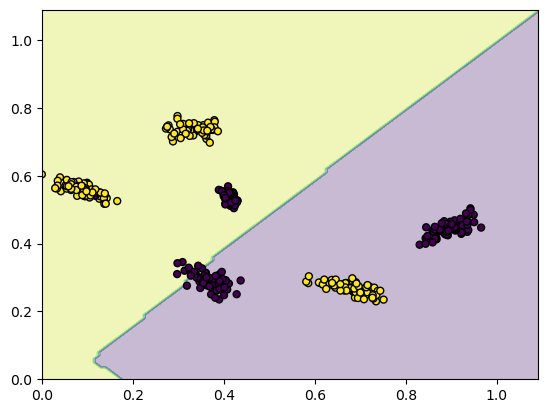

In [3]:
mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]

mmesh = np.stack((mesh.flatten(), mesh.T.flatten()))
mmesh = mmesh[:,np.newaxis,:]
print(mmesh)

x, y = sklearn.datasets.make_classification(class_sep=10, n_samples=2166, n_features=8, n_informative=4, n_classes=2,
                                            n_redundant=4, n_clusters_per_class=3, n_repeated=0, random_state=215366)

print(x)
x = x[:,[0,1]]
x = normalize(x)

x, x_test, y, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=215366)

x = x[:,np.newaxis,:]
x_test = x_test[:,np.newaxis,:]

num_classes = 2  # MNIST ma 10 klas (cyfry od 0 do 9)
train_labels_one_hot = tf.keras.utils.to_categorical(y, num_classes)

# Przekształć etykiety klas na wektory one-hot dla zbioru testowego
test_labels_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)
# print(train_labels_one_hot,'onehot')
# print(x_test.shape)

test = Model()


print(y.shape)

test.linear(neurony=10, wejscia=2)
test.relu()
#test.sigmoid()
test.linear(neurony=10, wejscia=10)
#test.sigmoid()
test.relu()
# test.linear(neurony=10, wejscia=10)
# test.relu()
test.linear(neurony=2, wejscia=10)
test.softmax()
#test.sigmoid()

test.learn( 1, x, train_labels_one_hot,batch=1,eta=0.01)
print(x_test.shape)
u = test.predict(x_test)
u = np.argmax(u,axis=2)
print(np.sum(u),len(u),np.sum(u.T[0] ==y_test), len(y_test), 'tutaj')


#wyswietlanie ------------------------------------
#macierz_pomylek = confusion_matrix(y_test, u)
#print(macierz_pomylek)

z = test.predict(mmesh.T)
#z = z.reshape(12100,2)
z = np.argmax(z,axis=2)
print(z,np.sum(z))
z = z.reshape(mesh.shape)
plt.contourf(mesh, mesh.T, z, alpha=0.3)
plt.scatter(x_test[:,:, 0], x_test[:,:,1], marker="o", c=y_test, s=25, edgecolor="k")

# disp = ConfusionMatrixDisplay(confusion_matrix=macierz_pomylek,display_labels= [0,1])
# fig, ax = plt.subplots(figsize=(15, 15))
# disp.plot(ax=ax)
plt.show()




In [1]:

import sklearn.datasets
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from mlp import normalize,Model
import tensorflow as tf

In [2]:

# Załaduj zbiór danych MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Przekształć etykiety klas na wektory one-hot dla zbioru treningowego
num_classes = 10  # MNIST ma 10 klas (cyfry od 0 do 9)
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)

# Przekształć etykiety klas na wektory one-hot dla zbioru testowego
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)
#
# print(train_labels_one_hot)
# print((train_images[0])/255)

In [3]:

test = Model((28,28,1))

#test.conv(1,(3,3))
# test.relu()
# #test.sigmoid()

test.flatten()
test.linear(neurony=128)
#test.flatten()

#test.sigmoid()
test.relu()
test.linear(neurony=256)
# #test.sigmoid()
test.relu()
test.linear(neurony=10)
test.softmax()
# #test.sigmoid()

test.learn( 20, train_images, train_labels_one_hot,batch=1,eta=0.000001)
# print(x_test.shape)
# u = test.predict(x_test)

  0%|          | 0/20 [00:00<?, ?it/s]


(28, 28) (784, 128)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 28)

In [4]:

u = test.predict(train_images[700:701])
i = train_labels_one_hot[700:701]
print(np.argmax(u),np.argmax(i))
print(u,i)

4 4
[[[3.90209838e-02 5.13917355e-06 9.58290094e-05 2.26829267e-05
   9.06408857e-01 1.27903153e-02 3.17915858e-02 1.02666528e-05
   9.72145928e-03 1.32880688e-04]]] [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
predictions = test.predict(train_images)
print(predictions)
print(predictions.shape)
predictions = np.argmax(predictions, axis=2)
print(predictions.T[0])
print(train_labels)
print(sum(predictions.T[0] == train_labels))

[[[2.79544183e-06 1.74178133e-09 9.05507420e-04 ... 3.19301815e-05
   1.23274443e-04 2.44994858e-06]]

 [[9.99976974e-01 5.94317379e-11 3.17740526e-07 ... 9.14663358e-08
   5.50748982e-06 1.34630198e-07]]

 [[3.20716541e-04 1.67368267e-08 2.30728203e-04 ... 3.26227147e-04
   2.05942518e-04 2.29591147e-03]]

 ...

 [[1.02034992e-05 3.09650826e-08 2.50252628e-06 ... 9.69194773e-06
   5.38286784e-04 1.80561323e-03]]

 [[5.08614396e-01 4.16264408e-06 8.97885651e-02 ... 8.29641565e-04
   4.88538981e-04 1.27114767e-03]]

 [[1.17405685e-03 1.02958020e-07 2.73198819e-04 ... 5.52958327e-07
   9.97662755e-01 8.37944449e-06]]]
(60000, 1, 10)
[5 0 4 ... 5 0 8]
[5 0 4 ... 5 6 8]
53756


In [13]:
print(len(train_labels))

60000
